In [1]:
# Pandas is used for data manipulation
import pandas as pd
import numpy as np

# Visualization imports
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Consistent plot size
from pylab import rcParams
rcParams['figure.figsize'] = (16,8)

# handle unwanted warnings
import warnings
warnings.filterwarnings(action='ignore',category=DeprecationWarning)
warnings.filterwarnings(action='ignore',category=FutureWarning)

# time series related imports
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from pmdarima import auto_arima


In [2]:
# Read in data and display fist 5 rows
df = pd.read_csv('TIME SERIES + TRIPADVISORS INDEX + VISITOR ATTENTION INDEX + TOPIC AND SENTIMENT INTENSITY + ECONOMIC INDEX - DATA COMPOSITION 1 (70-15-15).csv', index_col="Month", parse_dates=True)
df.head()

,Tourist Arrival,Number of Posts,Number of Comments,Airbnb Vietnam,Vietnam restaurant,Shopping in Hanoi,Shopping in Ho Chi Minh,Vietnam tour,Skyscanner,Vietnam visa,...,TOPIC 2,TOPIC 3,TOPIC 4,TOPIC 5,TOPIC 6,TOPIC 7,TOPIC 8,TOPIC 9,TOPIC 10,Class
Month,,,,,,,,,,,,,,,,,,,,,
2008-01-01,399556,403,3049,11,59,32,8,58,7,69,...,0.010894,0.889993,0.011228,0.010641,0.001710,0.014932,0.027566,0.014081,0.010241,Train
2008-01-02,411032,357,3211,0,51,0,0,46,6,61,...,0.010974,0.007221,0.006829,0.006410,0.005451,0.011673,0.014948,0.913561,0.013848,Train
2008-01-03,414332,344,3153,0,57,7,24,58,6,61,...,0.005849,0.006917,0.009097,0.007196,0.001611,0.007281,0.005533,0.014198,0.934153,Train
2008-01-04,395900,338,3184,0,51,6,9,58,6,66,...,0.013789,0.005867,0.911020,0.012191,0.001259,0.014063,0.019446,0.006807,0.008030,Train
2008-01-05,366387,369,2964,0,57,0,7,57,6,63,...,0.007257,0.010529,0.011619,0.014288,0.001458,0.015968,0.915464,0.010944,0.003609,Train


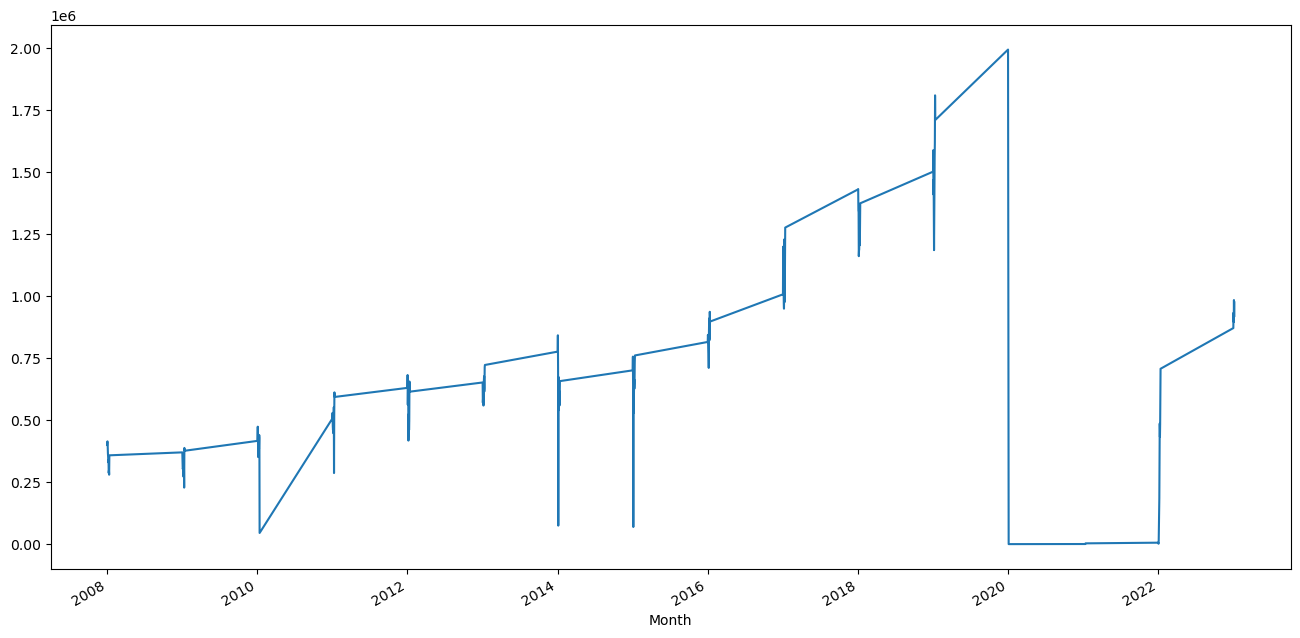

In [3]:
fig, ax = plt.subplots(figsize=(16,8))
ax = df['Tourist Arrival'].plot()
color_arr = ['g', 'r', 'm', 'b', 'y', 'k']
c_indx = 0
for x in df[df['Tourist Arrival']==1].index:
    ax.axvline(x=x, color=color_arr[c_indx], linewidth=0.5)
    if color_arr[c_indx] == 'k':
        c_indx = 0
    else:
        c_indx +=1

In [4]:
df1=df.drop(["Class"], axis=1)
print(df1)

            Tourist Arrival  Number of Posts  Number of Comments  \
Month                                                              
2008-01-01           399556              403                3049   
2008-01-02           411032              357                3211   
2008-01-03           414332              344                3153   
2008-01-04           395900              338                3184   
2008-01-05           366387              369                2964   
...                     ...              ...                 ...   
2023-01-02           932969              481                3576   
2023-01-03           895425              543                4058   
2023-01-04           984146              422                3135   
2023-01-05           916257              347                2609   
2023-01-06           975010              328                2339   

            Airbnb Vietnam  Vietnam restaurant  Shopping in Hanoi  \
Month                                         

In [5]:
auto_arima(df1['Tourist Arrival'], m=12, trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=inf, Time=1.03 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=4947.042, Time=0.02 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=4937.754, Time=0.07 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=4938.437, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=4945.121, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=4948.808, Time=0.03 sec
 ARIMA(1,1,0)(2,0,0)[12] intercept   : AIC=4939.754, Time=0.18 sec
 ARIMA(1,1,0)(1,0,1)[12] intercept   : AIC=4939.754, Time=0.29 sec
 ARIMA(1,1,0)(0,0,1)[12] intercept   : AIC=4938.184, Time=0.13 sec
 ARIMA(1,1,0)(2,0,1)[12] intercept   : AIC=4940.975, Time=0.39 sec
 ARIMA(0,1,0)(1,0,0)[12] intercept   : AIC=4935.707, Time=0.06 sec
 ARIMA(0,1,0)(2,0,0)[12] intercept   : AIC=4937.707, Time=0.17 sec
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=4937.707, Time=0.14 sec
 ARIMA(0,1,0)(0,0,1)[12] intercept   : AIC=4936.131, Time=0.05 sec
 ARIMA(0,1,0)(2,0,1)[12]

ARIMA(order=(0, 1, 0), scoring_args={}, seasonal_order=(1, 0, 0, 12),
      suppress_warnings=True, with_intercept=False)

In [6]:
train = df1['Tourist Arrival'][:'01/02/2019'].dropna()
test = df1['Tourist Arrival']['01/03/2019':].dropna()
exog_train = df1.drop(['Tourist Arrival'], axis=1)[:'01/02/2019'].dropna()
exog_test = df1.drop(['Tourist Arrival'], axis=1)['01/03/2019':].dropna()

In [7]:
import statsmodels.api as sm
model = SARIMAX(train,order=(0,1,0),seasonal_order=(1,0,0,12),exog = exog_train,
                                enforce_stationarity=False, enforce_invertibility=False)
results = model.fit()
results.summary()


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           38     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.17499D+01    |proj g|=  4.02526D-05


/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f=  1.17498D+01    |proj g|=  1.32970D-03

At iterate   10    f=  1.17494D+01    |proj g|=  2.02312D-02

At iterate   15    f=  1.17485D+01    |proj g|=  3.29646D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   38     17     23      1     0     0   1.565D-05   1.175D+01
  F =   11.748509794926347     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                    Tourist Arrival   No. Observations:                  134
Model:             SARIMAX(0, 1, 0)x(1, 0, 0, 12)   Log Likelihood               -1574.300
Date:                            Wed, 23 Aug 2023   AIC                           3224.601
Time:                                    21:54:26   BIC                           3330.841
Sample:                                         0   HQIC                          3267.749
                                            - 134                                         
Covariance Type:                              opg                                         
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Number of Posts           -19.5460    392.181     -0.050      0.960    -788.207     749.115
Number of Comments         20.6055     36.218      0.569      0.569     -50.381      91.592
Airbnb Vietnam          -1632.1994   2746.432     -0.594      0.552   -7015.108    3750.709
Vietnam restaurant       3875.7503   3253.646      1.191      0.234   -2501.279    1.03e+04
Shopping in Hanoi        -840.3072   3410.442     -0.246      0.805   -7524.650    5844.036
Shopping in Ho Chi Minh   606.0226   4255.481      0.142      0.887   -7734.566    8946.612
 Vietnam tour           -2762.9252   4902.339     -0.564      0.573   -1.24e+04    6845.483
 Skyscanner               400.0398   7036.597      0.057      0.955   -1.34e+04    1.42e+04
 Vietnam visa            -449.5791   4982.254     -0.090      0.928   -1.02e+04    9315.460
 Vietnam airport         1462.6983   3832.360      0.382      0.703   -6048.589    8973.986
 Vietnam flights         1116.1203   4315.984      0.259      0.796   -7343.052    9575.293
 Danang airport         -1213.5360   2266.866     -0.535      0.592   -5656.512    3229.440
 Hoi An                 -2147.3926   2962.885     -0.725      0.469   -7954.540    3659.755
 Vietnam weather          734.2598   2585.772      0.284      0.776   -4333.761    5802.281
 Visa for Vietnam         562.5202   5826.599      0.097      0.923   -1.09e+04     1.2e+04
 Sgn airport              916.3640   2942.030      0.311      0.755   -4849.908    6682.636
 Phu Quoc                2955.5043   2961.583      0.998      0.318   -2849.092    8760.100
 Vietnam itinerary      -1238.3566   2896.336     -0.428      0.669   -6915.070    4438.357
 Vietnam trip            3565.3749   2761.631      1.291      0.197   -1847.323    8978.073
 Things to do in Hue     1411.9207   3479.356      0.406      0.685   -5407.492    8231.334
 Vietnam backpackers    -4331.9833   4004.366     -1.082      0.279   -1.22e+04    3516.430
CCI                     -4717.7403   5164.948     -0.913      0.361   -1.48e+04    5405.371
PMI                     -1.311e+04   9657.050     -1.358      0.175    -3.2e+04    5817.388
REERI                   -9370.6644   1.37e+04     -0.683      0.494   -3.63e+04    1.75e+04
NegativityQDAP           2.462e+05   1.52e+05      1.618      0.106    -5.2e+04    5.44e+05
PositivityQDAP           3.086e+05   1.66e+05      1.862      0.063   -1.63e+04    6.34e+05
TOPIC 1                 -1.122e+05   1.27e+05     -0.886      0.376    -3.6e+05    1.36e+05
TOPIC 2                 -1.861e+05   7.38e+04     -2.523      0.012   -3.31e+05   -4.15e+04
TOPIC 3                 -2.162e+04   7.26e+04     -0.298      0.766   -1.64e+05    1.21e+05
TOPIC 4                 -8.728e+04   5.18e+04     -1.685      0.092   -1.89e+05    1.42e+04
TOPIC 5                 -5.318e+04   6.93e+04     -0.767      0.443   -1.89e+05    8.27e+04
TOPIC

In [8]:
start = len(train)
end = len(train) + len(test) - 1
y_pred = results.predict(start=start,end=end, exog = exog_test, dynamic=False).rename('SARIMA(0,1,0)(1,0,[0],12) Predictions')

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [9]:
from math import sqrt
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error 
from sklearn.metrics import mean_absolute_percentage_error

In [10]:
RMSE = np.sqrt(mean_squared_error(test, y_pred))
print("Root Mean Squared Error:", RMSE)

Root Mean Squared Error: 1249174.7571604163


In [11]:
MAE = mean_absolute_error(test, y_pred)
print("Mean Absolute Error:", MAE)

Mean Absolute Error: 1106940.6517569984


In [12]:
MAPE = mean_absolute_percentage_error(test, y_pred)
print("Mean Absolute Percentage Error:", MAPE)

Mean Absolute Percentage Error: 2.4907392128262896e+21


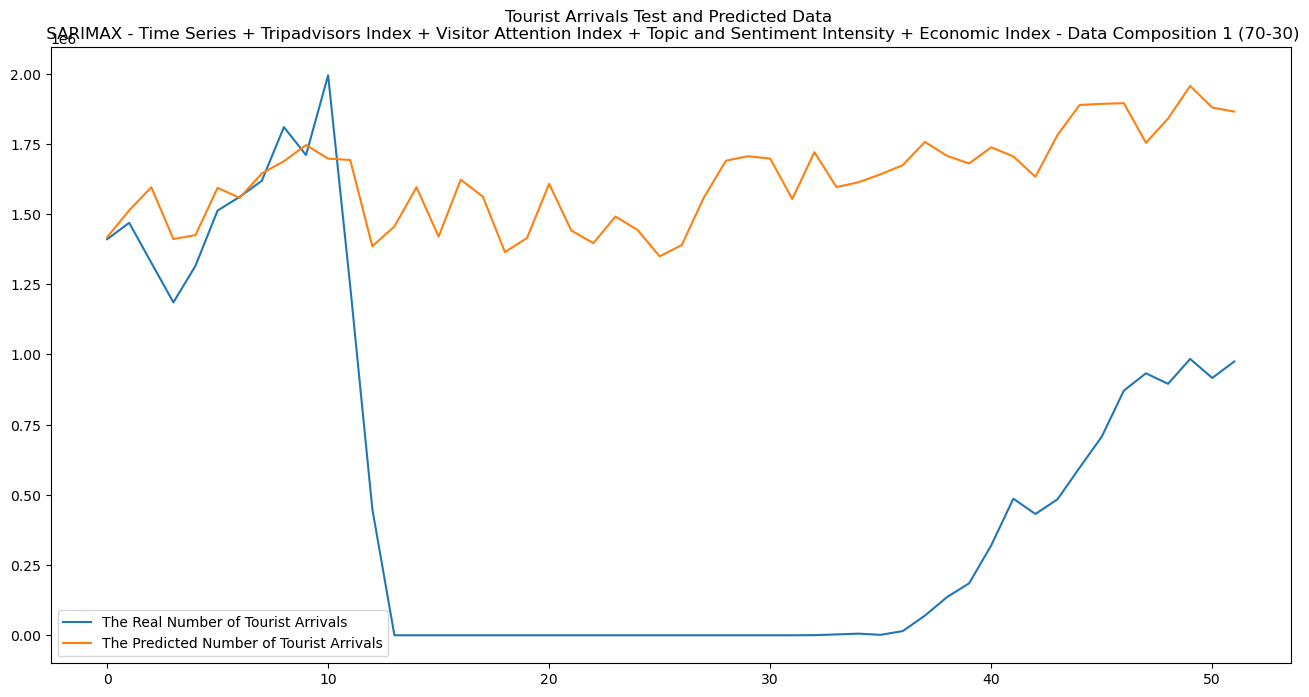

In [13]:
x_ax = range(len(test))
plt.plot(x_ax, test, label="The Real Number of Tourist Arrivals")
plt.plot(x_ax, y_pred, label="The Predicted Number of Tourist Arrivals")
plt.title("Tourist Arrivals Test and Predicted Data \n SARIMAX - Time Series + Tripadvisors Index + Visitor Attention Index + Topic and Sentiment Intensity + Economic Index - Data Composition 1 (70-30)")
plt.legend()
plt.show()